**About the Problem:**      

.

---



In [40]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from google.colab import drive

In [41]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df=pd.read_csv('/content/drive/MyDrive/Intership/shares of news article/reg_data (1).csv')

In [44]:
# Set the max_columns option to display all columns
pd.set_option('display.max_columns', None)


In [45]:
df

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,NaN,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,1,NaN,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,NaN,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,NaN,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,0.000000,0.000000,0.000000,918.0,918.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,NaN,0.100000,1.0,-0.466667,-0.8,-0.133333,0.000000,0.000000,0.500000,0.000000,NaN
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,NaN,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,NaN,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.6,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,NaN,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,NaN,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.028633,NaN,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.5,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,NaN,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,NaN,-0.260000,-0.5,NaN,0.100000,0.000000,0.400000,0.000000,1800.0
39640,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.6962

In [46]:
df.shape

(39644, 62)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      39644 non-null  int64  
 1   url                             35610 non-null  object 
 2    timedelta                      35821 non-null  float64
 3    n_tokens_title                 35666 non-null  float64
 4    n_tokens_content               35722 non-null  float64
 5    n_unique_tokens                35604 non-null  float64
 6    n_non_stop_words               35669 non-null  float64
 7    n_non_stop_unique_tokens       35697 non-null  float64
 8    num_hrefs                      35706 non-null  float64
 9    num_self_hrefs                 35683 non-null  float64
 10   num_imgs                       35742 non-null  float64
 11   num_videos                     35704 non-null  float64
 12   average_token_length           

In [48]:
df.nunique()

Unnamed: 0                       39644
url                              35610
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2342
                                 ...  
 title_subjectivity                639
 title_sentiment_polarity          773
 abs_title_subjectivity            504
 abs_title_sentiment_polarity      622
 shares                           1415
Length: 62, dtype: int64

In [49]:
#dropping the non-predictive attributes(url,timedelta) and Unnamed: 0
df=df.drop(['url',' timedelta','Unnamed: 0'],axis=1)

In [50]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,NaN,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,NaN,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,9.0,NaN,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,0.000000,0.000000,0.000000,918.0,918.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,NaN,0.100000,1.0,-0.466667,-0.8,-0.133333,0.000000,0.000000,0.500000,0.000000,NaN
3,9.0,531.0,0.503788,1.0,NaN,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,NaN,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.6,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,13.0,1072.0,NaN,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,NaN,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.028633,NaN,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.5,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,NaN,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,NaN,-0.260000,-0.5,NaN,0.100000,0.000000,0.400000,0.000000,1800.0
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,NaN,0.0,1.0,0.0,0.0,-1.0,616.0,NaN,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.029349,0.028575,0.231866,NaN,0.028575,NaN,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,NaN,0.7,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,NaN,1900.0
39641,10.0,442.0,0.516

### What's missing? <a name="subparagraph1"></a>

In [51]:
missing_vals = pd.DataFrame(df.isna().sum(), columns=['Sum'])
missing_vals = missing_vals.sort_values(by = ['Sum'], ascending=False)
missing_vals = missing_vals[missing_vals['Sum']>0]  
missing_vals['Percent'] = missing_vals['Sum']/39644*100    #creating another column with percent
missing_vals

,Sum,Percent
weekday_is_wednesday,4074,10.276460
title_sentiment_polarity,4058,10.236101
LDA_02,4055,10.228534
kw_min_avg,4050,10.215922
min_negative_polarity,4042,10.195742
n_unique_tokens,4040,10.190697
global_rate_positive_words,4038,10.185652
num_keywords,4021,10.142771
is_weekend,4013,10.122591
kw_avg_max,4009,10.112501


### let's fill the remaining missing data <a name="subparagraph1"></a>



In [52]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [53]:
cat_cols = [' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world',
            ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',' weekday_is_sunday', ' is_weekend']

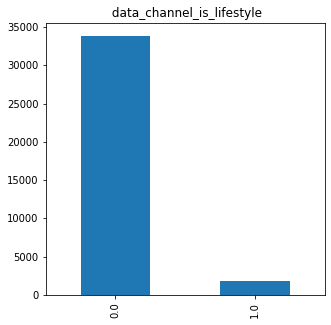

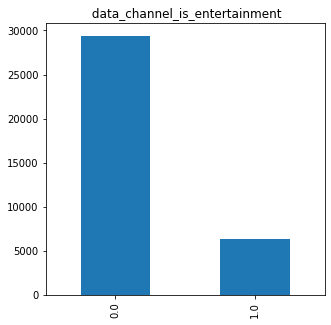

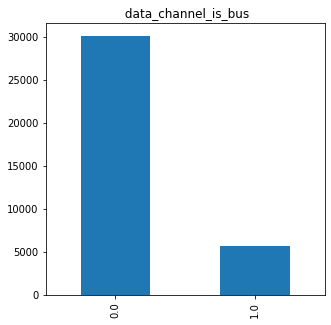

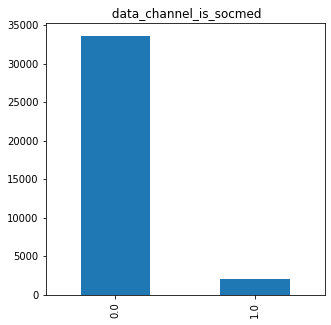

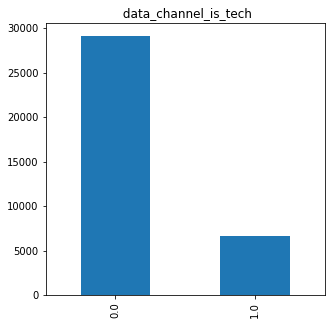

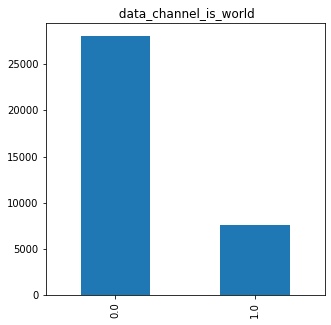

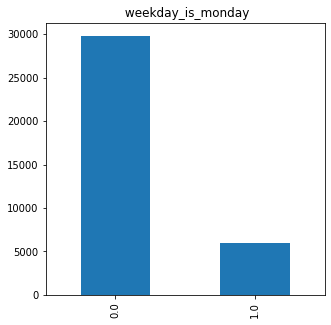

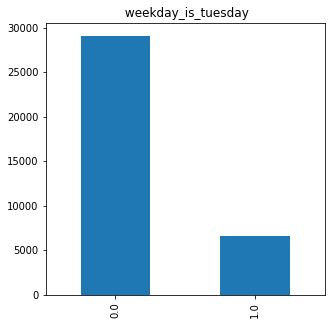

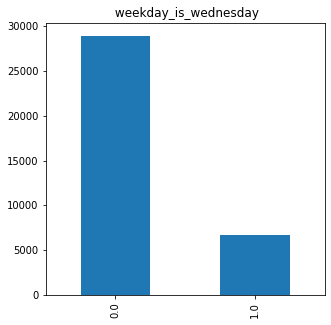

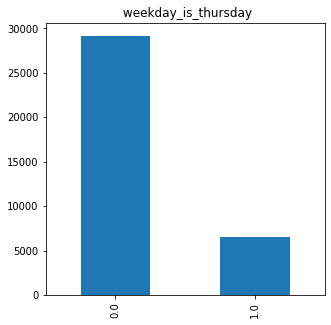

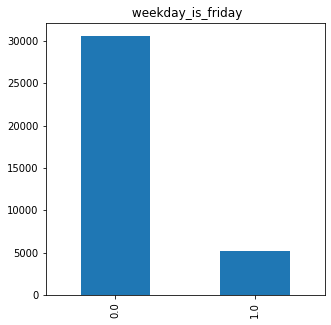

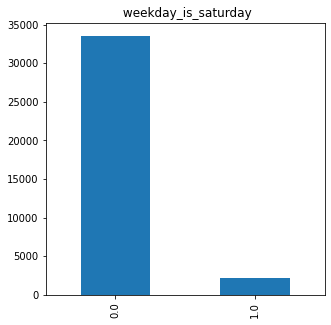

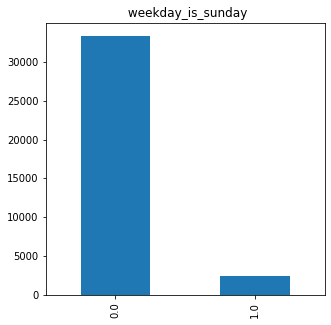

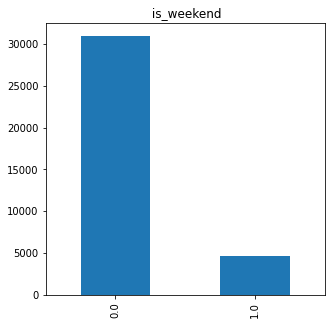

In [54]:
# iterate over the columns and create a bar plot for each column
for col in cat_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [55]:
#filling missing values in cat columns by mode

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [56]:
#taking num cols into a list
num_df=df.drop(cat_cols,axis=1)
num_cols=num_df.columns
num_cols

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
  

In [57]:
#filling missing values in num columns by median
df[num_cols] = df[num_cols].fillna(value = df[num_cols].median())

In [58]:
df.isnull().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

### Scaling <a name="subparagraph6"></a>


In [59]:
num_cols1=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
           ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',' self_reference_max_shares',
           ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words',
           ' rate_negative_words', ' avg_positive_polarity',' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity',' max_negative_polarity', ' title_subjectivity',
           ' title_sentiment_polarity', ' abs_title_subjectivity',' abs_title_sentiment_polarity']

In [60]:
def min_max_scaler(X):
    # Compute the minimum and maximum values of each feature
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    
    # Scale the input features to [0, 1] range
    X_scaled = (X - min_vals) / (max_vals - min_vals)
    
    return X_scaled

In [61]:
#Extract the numerical columns into a NumPy array
X = df[num_cols1].values

In [62]:
X_scaled = min_max_scaler(X)

In [63]:
#Replace the original columns with the scaled data in order
for i, col in enumerate(num_cols1):
   df[col] = X_scaled[:, i]

In [64]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000023,0.0,0.0,0.000000,0.000277,0.0,0.0,0.000588,0.000588,0.000588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.456944,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.7,0.650000,0.4,0.800000,0.500000,0.406250,0.000000,0.187500,593.0
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.000000,0.000277,0.0,0.0,0.001423,0.003320,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.7,0.881250,0.5,0.900000,0.000000,0.500000,1.000000,0.000000,711.0
2,0.333333,0.048383,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,0.0,0.290339,0.000277,0.0,0.0,0.001089,0.001089,0.002609,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.358695,0.100000,1.0,0.533333,0.2,0.866667,0.000000,0.500000,1.000000,0.000000,1400.0
3,0.333333,0.062662,0.000719,0.00096,0.001063,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.002646,0.0,0.000023,0.0,1.0,0.000000,0.000277,0.0,0.0,0.000000,0.003320,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030824,0.452833,0.537664,0.043173,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.8,0.630303,0.4,0.833333,0.000000,0.500000,1.000000,0.000000,1200.0
4,0.523810,0.126505,0.000770,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.002646,0.0,0.005513,0.0,0.0,0.000000,0.283804,0.0,0.0,0.000646,0.018973,0.003737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030888,0.036012,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.0,0.779808,0.5,0.950000,0.454545,0.568182,0.090909,0.136364,505.0


### Train_test_split <a name="subparagraph6"></a>


In [65]:
X = df.drop(columns=[' shares'], axis=1)
y = df[' shares']


In [66]:
# Split the data into training and validation sets
train_size = int(len(df) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 27750
test data: 11894


### Model Building <a name="subparagraph6"></a>


In [77]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [68]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [80]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

In [79]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 1.567898799654


In [81]:
y_train_pred

array([16870.34705253, 17064.89798434, 16888.45913743, ...,
       16609.58725904, 16609.58725904, 17025.19967152])

In [84]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

In [83]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)

Mean Absolute Error: 1.557867489655


In [85]:
y_test_pred

array([16501.74161293, 16786.02610595, 16986.41903826, ...,
       16907.4776018 , 16678.18045984, 17217.1257716 ])

### Hyperparameter tuning <a name="subparagraph6"></a>


In [ ]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y):
        param_combinations = list(itertools.product(*self.param_grid.values()))
        best_params = None
        best_score = float('inf')
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = param_dict
        self.best_params_ = best_params
        self.best_estimator_ = self.estimator(**best_params)
        self.best_estimator_.fit(X, y)
        self.cv_results_ = {'params': [], 'mean_test_score': []}
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            self.cv_results_['params'].append(param_dict)
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            self.cv_results_['mean_test_score'].append(avg_score)
        return self

# Define the parameter grid
param_grid = {
    'n_trees': [10, 20],
    'max_depth': [2, 4],
    'subsample_size': [0.5, 0.7]
}

# Define the estimator
estimator = RandomForestRegressor

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.mean((y_test - grid_search.best_estimator_.predict(X_test))**2))

Best parameters: {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.7}
Best score: 1.0108286565437774


In [ ]:
rf = RandomForestRegressor(n_trees=20, max_depth=2, subsample_size=0.7)
rf.fit(X_train, y_train)

In [89]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

In [88]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 0.9709867549675


In [92]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

In [91]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)

Mean Absolute Error: 0.9567547785377
